# Packages Requiered

In [1]:
import Bio
import pandas as pd

In [2]:
#importing packages needed to run codes
from Bio import SeqIO
from Bio.Data import CodonTable
from Bio.Seq import Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Bio.SeqUtils.ProtParam import ProteinAnalysis


# References:

1. https://biopython.org/docs/1.76/api/Bio.SeqIO.html
2. https://matplotlib.org/stable/users/explain/colors/colormap-manipulation.html#sphx-glr-users-explain-colors-colormap-manipulation-py
3. https://biopython.org/docs/1.76/api/Bio.SeqUtils.ProtParam.html
4. https://animaldiversity.org/accounts/Eudyptula_minor/


# Functions

1. Here Dr.X define the function to get the sequences 

In [3]:

def get_sequences_from_file(fasta_fn): #define new function mentioned above
    sequence_data_dict = {} #create an empty dictionary for sequence data
    for record in SeqIO.parse(fasta_fn, "fasta"): #for loop to identify sequences within .fasta file for each record 
        description = record.description.split() #assign function to split strings to variable
        species_name = description[1] + " " + description[2] #create species name from .fasta file
        sequence_data_dict[species_name] = record.seq #assign sequence to corresponding species name
    return(sequence_data_dict) #return dictionary

In [4]:
res = get_sequences_from_file("penguins_cytb.fasta")
res

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'),
 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'),
 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAAC

# DNA translation Dr.X's DNA seqeunce for Penguins

2. function that translates a string of nucleotides to amino aicds based Dr.X's pseudo-code suggestion

Input:DNA seqeunce

Output: Amino acid sequence

In [5]:
def translate_function(string_nucleotides):
    # Get the codon table for Vertebrate Mitochondrial DNA
    
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] #uses Biopython package
    
    aa_seq_string = ""  # to store the resulting amino acid sequence
    
    # Iterate over the string in steps of 3 to get codons
    for i in range(0, len(string_nucleotides) - len(string_nucleotides) % 3, 3):
        codon = string_nucleotides[i:i+3]  # extract a codon
        if codon in mito_table.stop_codons:
            # Check if the codon is a stop codon
            continue  # skip the stop codon
        aa = mito_table.forward_table[codon]  # get the corresponding amino acid
        aa_seq_string += aa  # append the amino acid to the sequence
    
    return aa_seq_string

# Example Usage
#dna_sequence = "ATGTTGACCCTGAAATAG"  # example DNA sequence which includes a stop codon at the end (TAG)
#protein_sequence = translate_function(dna_sequence)
#print(protein_sequence)  # prints the translated protein sequence


# Alternative DNA translation

3. Alternative translation for the DNA string

In [6]:
def translate_to_protein(dna_string):
    """
    Translates a DNA string into an amino acid sequence if the input is valid; otherwise, returns an error message.
    
    Parameters:
    dna_string (str): A DNA sequence (only 'A', 'T', 'C', 'G' are valid).

    Returns:
    str: Amino acid sequence or error message.

    Examples:
        >>> translate_to_protein('GCGGCTTCATAGGAG')  # Returns 'AAS*E'
        >>> translate_to_protein(123)                # Returns error for invalid type
        >>> translate_to_protein('GCGGCTXCATAGGAG')  # Returns error for invalid characters
    """
    # Validate input type and characters
    
    if not isinstance(dna_string, str) or any(char not in 'ATCG' for char in dna_string.upper()):
        if not isinstance(dna_string, str):
            return 'Error: Invalid input type, expected a string.'
        else:
            return 'Error: Input contains non-DNA characters.'

    # Translate sequence to amino acids
    aa_seq = Seq(dna_string).translate()
    return str(aa_seq)

# Example usage
#print(translate_to_protein('GCGGCTTCATAGGAG'))  # Output: 'AAS*E'
#print(translate_to_protein(123))  # Output: Error message
#print(translate_to_protein('GCGGCTXCATAGGAG'))  # Output: Error message


# GC content and Mw analysis function

4. the following is a function calculates the GC-content  and the molecular weight of DNA seqeuence and returns the value

In [7]:
def calculate_gc_content(dna_seq):
    """ Calculate the GC content of DNA sequence without using BioPython. """
    dna_seq = dna_seq.upper()
    gc_count = sum(1 for base in dna_seq if base in ['G', 'C'])
    try:
        return (gc_count / len(dna_seq)) * 100
    except ZeroDivisionError:  # Handle empty string case
        return 0.0




In [8]:
def calculate_molecular_weight(aa_seq):
    analysed_seq = ProteinAnalysis(aa_seq) #analyses amino acid sequence
    mol_weight = analysed_seq.molecular_weight() #calculates molecular weight of the analysed sequence
    return(mol_weight)

In [9]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")
calculate_molecular_weight(cytb_seqs['Aptenodytes forsteri'])

100706.24799999999

# MAIN

In [10]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") #import the fasta files and assign them to a dictionary

penguins_df = pd.read_csv("penguins_mass.csv") #read .csv file by creating pandas DataFrame, Includes only data for body mass 
species_list = list(penguins_df.species) #create species of penguin 

penguins_df #inspect the data frame

,species,mass
0,Aptenodytes forsteri,28.00
1,Aptenodytes patagonicus,13.40
2,Eudyptes chrysocome,2.80
3,Eudyptes chrysolophus,4.50
4,Eudyptes sclateri,4.25
5,Eudyptula minor,1.60
6,Pygoscelis adeliae,4.60
7,Pygoscelis antarctica,4.10
8,Pygoscelis papua,6.10
9,Spheniscus demersus,3.20


# Molecular weight and GC content for the Penguin

6. Dr. X: Add two new columns to the bears DataFrame: (1) molecular weight and (2) GC content Set the value to 'NaN' to indicate that these cells are currenlty empty

In [11]:
penguins_df['Mol Weight']='NaN' #creates and new coumn setting a common value to each element in the column
penguins_df['GC content']= 'NaN'
penguins_df

,species,mass,Mol Weight,GC content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


# Translate neculotides

7. Wtite a for-loop that translate each seqeunce and also gets molecular weight and computes the GC content of each translated seqeunce and adds those data to DataFrame

In [12]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")
translate_function(cytb_seqs['Aptenodytes forsteri'])

'MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH'

In [13]:
#from Bio.SeqUtils import GC as calculate_gc_content
for key, value in cytb_seqs.items():
    aa_seq = translate_function(value) #translate dna sequence into amino acid sequence
#     aa_seq_string = str(aa_seq) #making the aa_seq into a string
    mol_weight = calculate_molecular_weight(aa_seq) #calculates molecular weight of amino acids
    GC_string = str(value) #making the dna sequence into a string
    gc_content = calculate_gc_content(GC_string)#computes the calculate_gc_content function
    penguins_df.at[penguins_df.loc[penguins_df.species == key,'Mol Weight'].index[0], "Mol Weight"] = mol_weight #inserting the molecular weight into datafram
    penguins_df.at[penguins_df.loc[penguins_df.species == key,'GC content'].index[0], "GC content"] = gc_content #inserting GC content into dataframe
    
penguins_df

,species,mass,Mol Weight,GC content
0,Aptenodytes forsteri,28.00,42459.6021,48.381452
1,Aptenodytes patagonicus,13.40,42563.7067,49.693788
2,Eudyptes chrysocome,2.80,42475.5753,51.181102
3,Eudyptes chrysolophus,4.50,42445.5493,50.918635
4,Eudyptes sclateri,4.25,42475.5753,50.831146
5,Eudyptula minor,1.60,42491.6408,49.256343
6,Pygoscelis adeliae,4.60,42458.614,49.081365
7,Pygoscelis antarctica,4.10,42404.5423,47.769029
8,Pygoscelis papua,6.10,42595.8759,47.156605
9,Spheniscus demersus,3.20,42431.549,48.293963


In [15]:
penguins_df.to_csv('penguins_df_copy.csv', index=False)

8. Plot a bar-chart of the mass with the x-axes labeled with species names.
 *Q1* What is the smallest penguin species? 
 *Q2* What is the geographical range of this species?

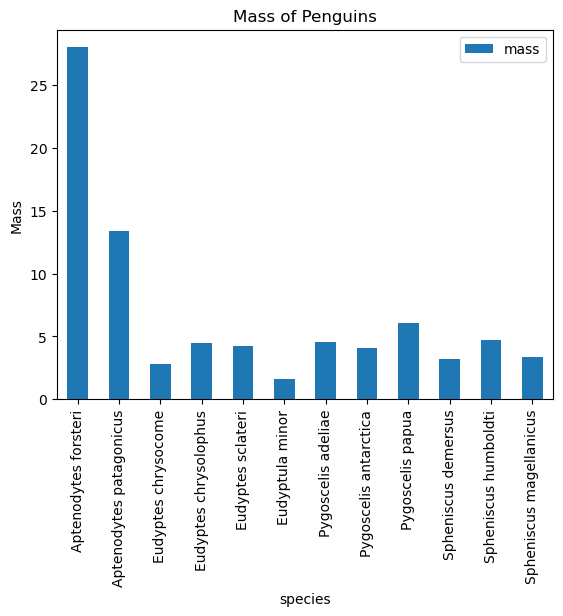

In [16]:
import numpy as np
import matplotlib.pyplot as plt
#plot a bar
penguins_mass =penguins_df.plot.bar(x = 'species', y = 'mass', title = "Mass of Penguins", ylabel = "Mass")

The smallest penguin  is Eudyptula minor
 they are found in the southern coast of Australia and as far as nort as the south solitary island of the coast of new south wales

9.  Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

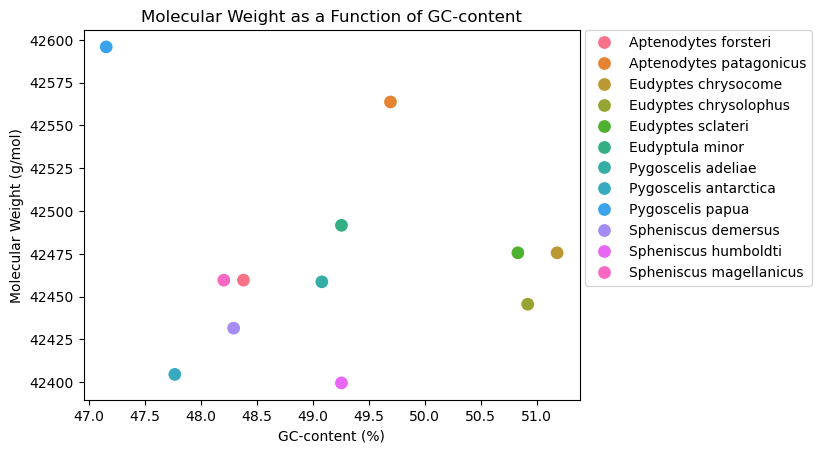

In [17]:
# plot 'GC content' on the x-axis and 'Mol Weight' on the y-axis

# Create a scatter plot
sns.scatterplot(x = "GC content", y = "Mol Weight", data = penguins_df, s = 100, hue = "species")

# Adding title and labels
plt.title('Molecular Weight as a Function of GC-content')
plt.xlabel('GC-content (%)')
plt.ylabel('Molecular Weight (g/mol)')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

# Show the plot
plt.show()


10. Save the new DataFrame to a file called "penguins_mass_cytb.csv"

In [18]:
#print (penguins_df)

#saving the data frame in to a CSV file
penguins_df.to_csv('penguins_mass_cytb.csv', index=False)
#penguins_mass